In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ~/wide-all/butler_wide_20220930-data-lsst-backup.csv


/home/dave/wide-all/butler_wide_20220930-data-lsst-backup.csv


In [3]:
df = pd.read_csv('~/wide-all/butler_wide_20220930-data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

/tmp/ipykernel_111549/553303426.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/wide-all/butler_wide_20220930-data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])


,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_265.zip,97826166,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2.0,0.157886,2025-09-12 11:40:41.336259,2025-09-12 11:40:41.494145
1,collated_652.zip,96861342,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2.0,0.131633,2025-09-12 11:40:41.349119,2025-09-12 11:40:41.480752
2,collated_552.zip,104110294,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2.0,0.145453,2025-09-12 11:40:41.482479,2025-09-12 11:40:41.627932
3,collated_223.zip,97225442,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4.0,0.159500,2025-09-12 11:40:41.447032,2025-09-12 11:40:41.606532
4,collated_935.zip,128409440,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,3.0,0.107181,2025-09-12 11:40:41.538208,2025-09-12 11:40:41.645389
...,...,...,...,...,...,...,...
3986548,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,125637120,NaN,NaN,1.170023,2025-09-15 22:00:07.236019,2025-09-15 22:00:08.406042
3986549,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,193996800,NaN,NaN,1.737014,2025-09-15 22:00:06.887987,2025-09-15 22:00:08.625001
3986550,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,120277440,NaN,NaN,1.329767,2025-09-15 22:00:07.312365,2025-09-15 22:00:08.642132
3986551,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,123390720,NaN,NaN,1.199208,2025-09-15 22:00:07.712487,2025-09-15 22:00:08.911695


In [4]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].astype('Int64')
df['UPLOAD_END'] = pd.to_datetime(df['UPLOAD_END'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['UPLOAD_START'] = pd.to_datetime(df['UPLOAD_START'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['FILE_SIZE'] = df['FILE_SIZE'].astype('Int64')
df = df.dropna(subset=['UPLOAD_END', 'UPLOAD_START', 'FILE_SIZE'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_265.zip,97826166,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.157886,2025-09-12 11:40:41.336259,2025-09-12 11:40:41.494145
1,collated_652.zip,96861342,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.131633,2025-09-12 11:40:41.349119,2025-09-12 11:40:41.480752
2,collated_552.zip,104110294,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.145453,2025-09-12 11:40:41.482479,2025-09-12 11:40:41.627932
3,collated_223.zip,97225442,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4,0.159500,2025-09-12 11:40:41.447032,2025-09-12 11:40:41.606532
4,collated_935.zip,128409440,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,3,0.107181,2025-09-12 11:40:41.538208,2025-09-12 11:40:41.645389
...,...,...,...,...,...,...,...
3986548,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,125637120,NaN,<NA>,1.170023,2025-09-15 22:00:07.236019,2025-09-15 22:00:08.406042
3986549,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,193996800,NaN,<NA>,1.737014,2025-09-15 22:00:06.887987,2025-09-15 22:00:08.625001
3986550,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,120277440,NaN,<NA>,1.329767,2025-09-15 22:00:07.312365,2025-09-15 22:00:08.642132
3986551,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,123390720,NaN,<NA>,1.199208,2025-09-15 22:00:07.712487,2025-09-15 22:00:08.911695


In [5]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

/tmp/ipykernel_111549/4131888514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']


,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_265.zip,97826166,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.157886,2025-09-12 11:40:41.336259,2025-09-12 11:40:41.494145,False
2,collated_552.zip,104110294,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.145453,2025-09-12 11:40:41.482479,2025-09-12 11:40:41.627932,False
9,collated_442.zip,126269054,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.157125,2025-09-12 11:40:41.533783,2025-09-12 11:40:41.690908,False
14,collated_1187.zip,132810254,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4,0.209518,2025-09-12 11:40:41.704785,2025-09-12 11:40:41.914303,False
22,collated_1824.zip,127646778,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4,0.091614,2025-09-12 11:40:41.674783,2025-09-12 11:40:41.766397,False
...,...,...,...,...,...,...,...,...
3976545,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,162541440,NaN,<NA>,1.748258,2025-09-15 21:36:39.714378,2025-09-15 21:36:41.462636,False
3976547,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,125202240,NaN,<NA>,1.406578,2025-09-15 21:36:41.774465,2025-09-15 21:36:43.181043,False
3980968,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,126737280,NaN,<NA>,1.350215,2025-09-15 21:47:39.315351,2025-09-15 21:47:40.665566,False
3982233,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,84317760,NaN,<NA>,0.928588,2025-09-15 21:50:33.155225,2025-09-15 21:50:34.083813,False


In [6]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
1,collated_652.zip,96861342,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.131633,2025-09-12 11:40:41.349119,2025-09-12 11:40:41.480752,True
3,collated_223.zip,97225442,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4,0.159500,2025-09-12 11:40:41.447032,2025-09-12 11:40:41.606532,True
4,collated_935.zip,128409440,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,3,0.107181,2025-09-12 11:40:41.538208,2025-09-12 11:40:41.645389,True
5,collated_726.zip,116705698,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,4,0.101039,2025-09-12 11:40:41.460811,2025-09-12 11:40:41.561850,True
6,collated_1856.zip,107525962,butler_wide_20220930/data/data/u/ir-shir1/DRP/...,2,0.123467,2025-09-12 11:40:41.424105,2025-09-12 11:40:41.547572,True
...,...,...,...,...,...,...,...,...
3986548,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,125637120,NaN,<NA>,1.170023,2025-09-15 22:00:07.236019,2025-09-15 22:00:08.406042,True
3986549,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,193996800,NaN,<NA>,1.737014,2025-09-15 22:00:06.887987,2025-09-15 22:00:08.625001,True
3986550,/rds/project/rds-rPTGgs6He74/ras81/lsst-ir-fus...,120277440,NaN,<NA>,1.329767,2025-09-15 22:00:07.312365,2025-09-15 22:00:08.642132,True
3986551,/rds/project/rds-lT5YGmtKack/ras81/butler_wide...,123390720,NaN,<NA>,1.199208,2025-09-15 22:00:07.712487,2025-09-15 22:00:08.911695,True


In [7]:
df = df.drop(columns=['ZIP_CONTENTS'])

In [8]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df.drop(columns=['LOCAL_PATH'], inplace=True)
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,97826166,2,0.157886,2025-09-12 11:40:41.336259,2025-09-12 11:40:41.494145,False,zip
1,96861342,2,0.131633,2025-09-12 11:40:41.349119,2025-09-12 11:40:41.480752,True,zip
2,104110294,2,0.145453,2025-09-12 11:40:41.482479,2025-09-12 11:40:41.627932,False,zip
3,97225442,4,0.159500,2025-09-12 11:40:41.447032,2025-09-12 11:40:41.606532,True,zip
4,128409440,3,0.107181,2025-09-12 11:40:41.538208,2025-09-12 11:40:41.645389,True,zip
...,...,...,...,...,...,...,...
3986548,125637120,<NA>,1.170023,2025-09-15 22:00:07.236019,2025-09-15 22:00:08.406042,True,file
3986549,193996800,<NA>,1.737014,2025-09-15 22:00:06.887987,2025-09-15 22:00:08.625001,True,file
3986550,120277440,<NA>,1.329767,2025-09-15 22:00:07.312365,2025-09-15 22:00:08.642132,True,file
3986551,123390720,<NA>,1.199208,2025-09-15 22:00:07.712487,2025-09-15 22:00:08.911695,True,file


In [9]:
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,97826166,2,0.157886,2025-09-12 11:40:41.336259,2025-09-12 11:40:41.494145,False,zip
1,96861342,2,0.131633,2025-09-12 11:40:41.349119,2025-09-12 11:40:41.480752,True,zip
2,104110294,2,0.145453,2025-09-12 11:40:41.482479,2025-09-12 11:40:41.627932,False,zip
3,97225442,4,0.159500,2025-09-12 11:40:41.447032,2025-09-12 11:40:41.606532,True,zip
4,128409440,3,0.107181,2025-09-12 11:40:41.538208,2025-09-12 11:40:41.645389,True,zip
...,...,...,...,...,...,...,...
3986548,125637120,<NA>,1.170023,2025-09-15 22:00:07.236019,2025-09-15 22:00:08.406042,True,file
3986549,193996800,<NA>,1.737014,2025-09-15 22:00:06.887987,2025-09-15 22:00:08.625001,True,file
3986550,120277440,<NA>,1.329767,2025-09-15 22:00:07.312365,2025-09-15 22:00:08.642132,True,file
3986551,123390720,<NA>,1.199208,2025-09-15 22:00:07.712487,2025-09-15 22:00:08.911695,True,file


In [10]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(2328, 3984213)

In [11]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

489.767699

In [12]:
print(f"Total upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Avergage number of files per zip: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].mean():.2f}")
print(f"Total files in zips: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.0f}")
print(f"Average upload time per file in zips: {zip_upload_time / df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.2f} seconds")
print(f"Total upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Total upload time: {df['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time: {df['UPLOAD_TIME'].mean():.2f} seconds")

Total upload time for zip files: 490 seconds
Average upload time for zip files: 0.21 seconds
Avergage number of files per zip: 13.39
Total files in zips: 31180
Average upload time per file in zips: 0.02 seconds
Total upload time for file uploads: 5710603 seconds
Average upload time for file uploads: 1.43 seconds
Total upload time: 5711093 seconds
Average upload time: 1.43 seconds


In [13]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

244.3747678855434

In [14]:
print(f"Zip file size stats (MB):")
print(df[df['TYPE'] == 'zip']['FILE_SIZE'].describe() / (1024 * 1024))

Zip file size stats (MB):
count       0.00222
mean     107.491307
std        17.66445
min        1.551573
25%       98.754343
50%      112.025304
75%      119.328079
max      128.079893
Name: FILE_SIZE, dtype: Float64


In [15]:
print(f"File size stats (MB):")
print(df[df['TYPE'] == 'file']['FILE_SIZE'].describe() / (1024 * 1024))

File size stats (MB):
count       3.799642
mean      131.388373
std        69.393014
min        64.000854
25%        107.18811
50%       119.292297
75%       130.042419
max      4701.554136
Name: FILE_SIZE, dtype: Float64


In [16]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
print(f"Transfer rate stats (Gb/s):")
df['TRANSFER_RATE'].describe()

Transfer rate stats (Gb/s):


count    3986541.0
mean      0.765063
std       0.259705
min       0.009575
25%       0.631833
50%       0.747937
75%       0.874659
max      17.282337
Name: TRANSFER_RATE, dtype: Float64

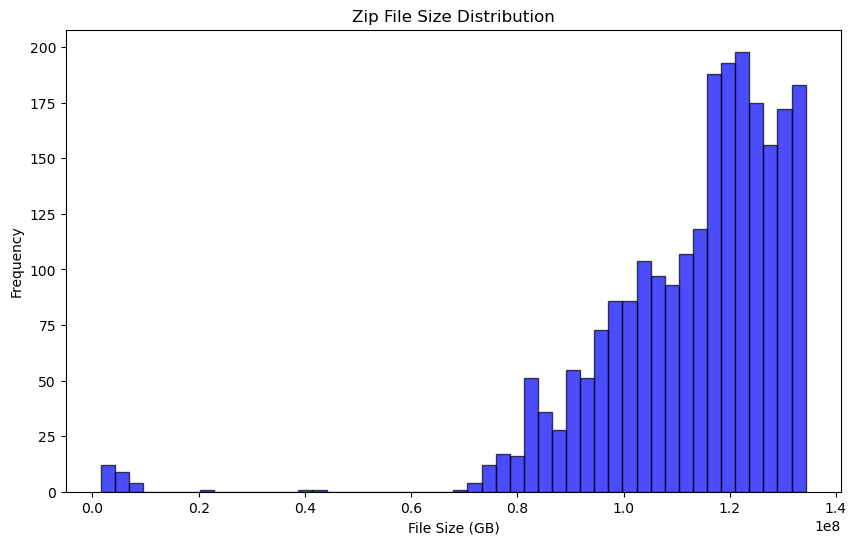

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILE_SIZE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution')
plt.xlabel('File Size (GB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

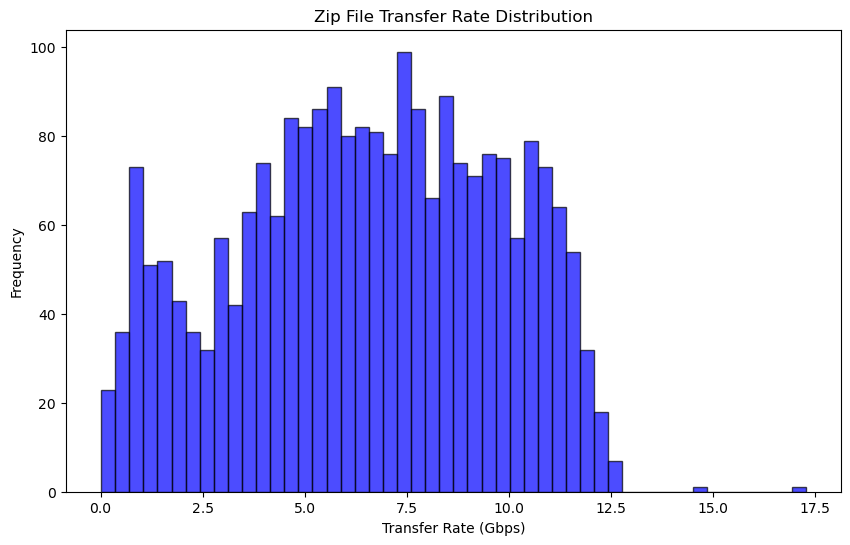

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

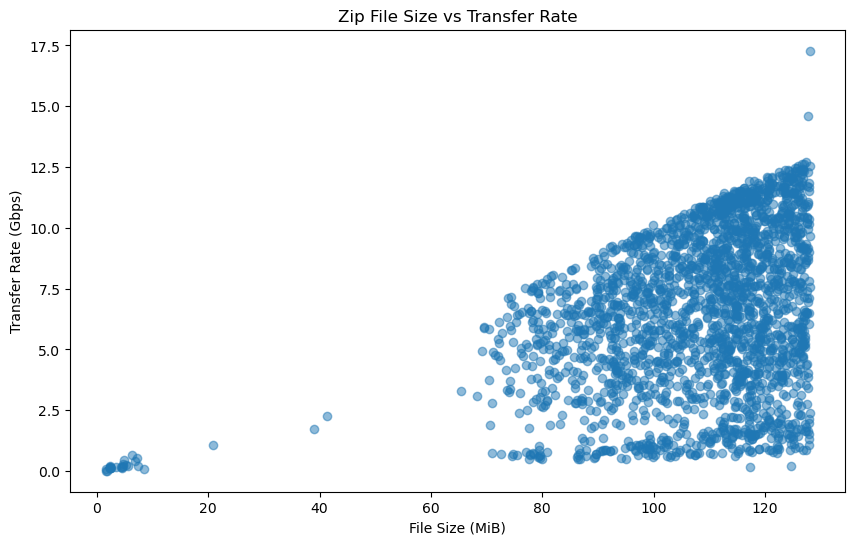

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'zip']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'zip']['TRANSFER_RATE'], alpha=0.5)
plt.title('Zip File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

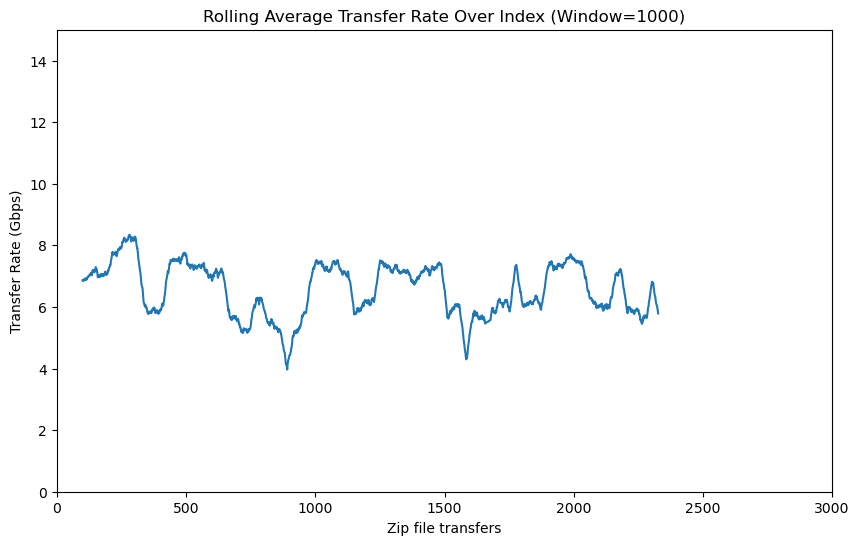

In [20]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].rolling(window=100).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,3000)
plt.ylim(0, 15)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

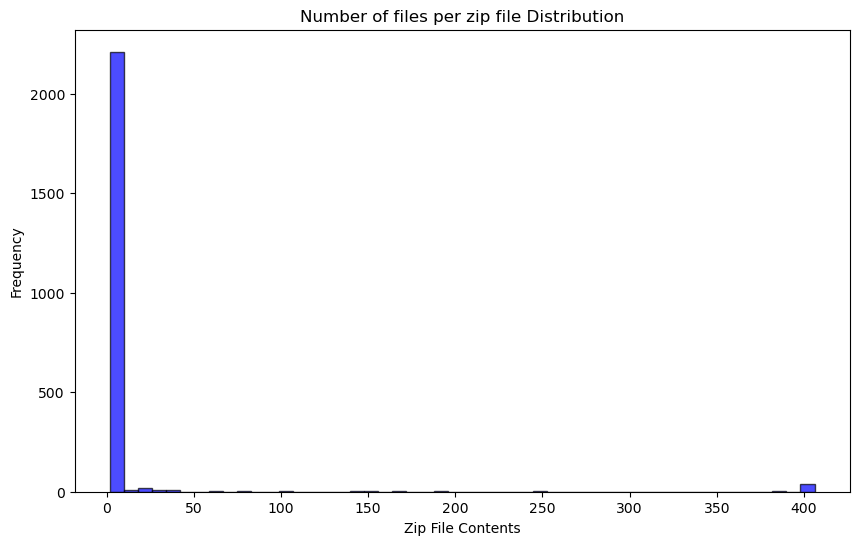

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Zip File Contents')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

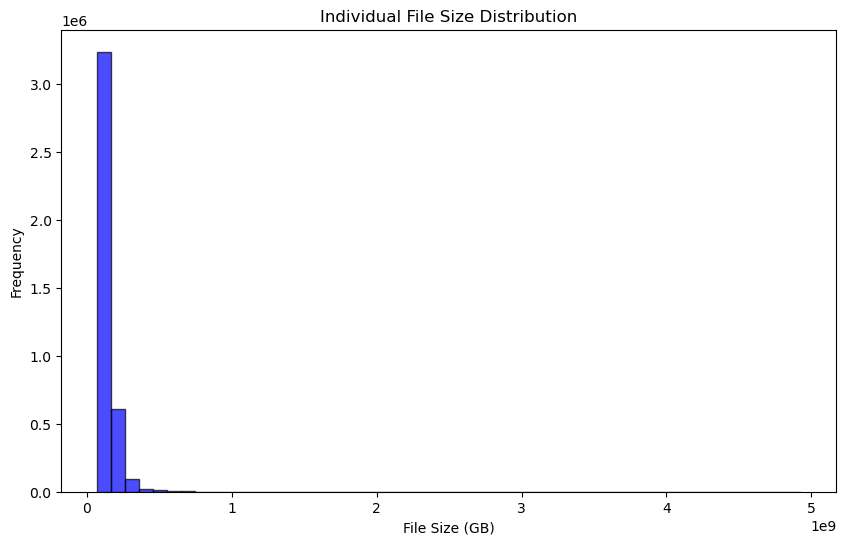

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['FILE_SIZE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Size Distribution')
plt.xlabel('File Size (GB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

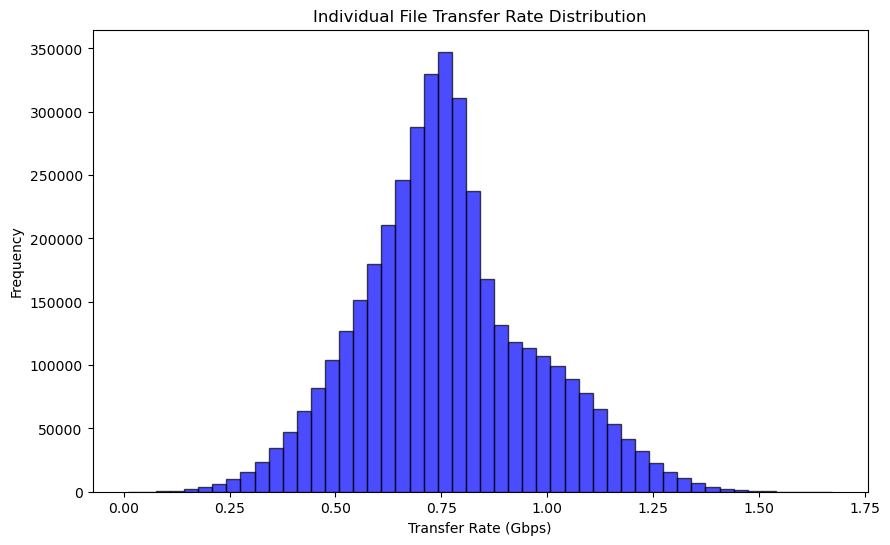

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

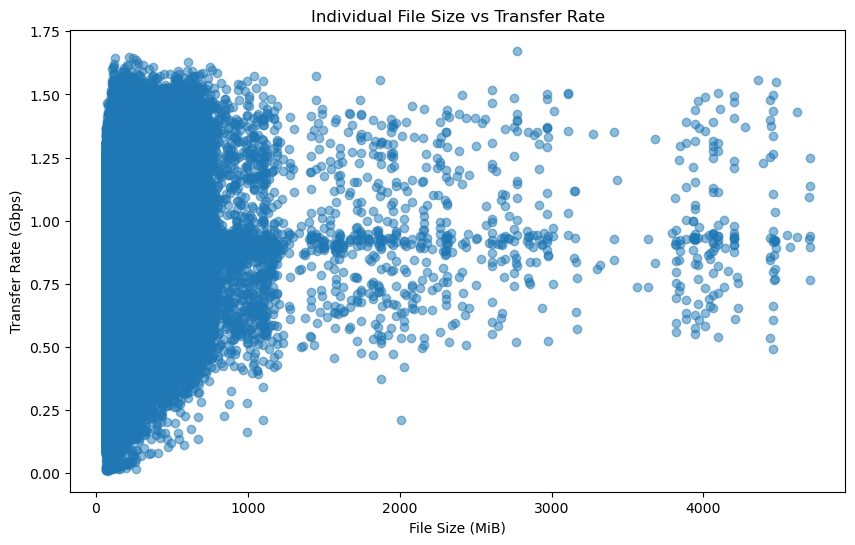

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'file']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'file']['TRANSFER_RATE'], alpha=0.5)
plt.title('Individual File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

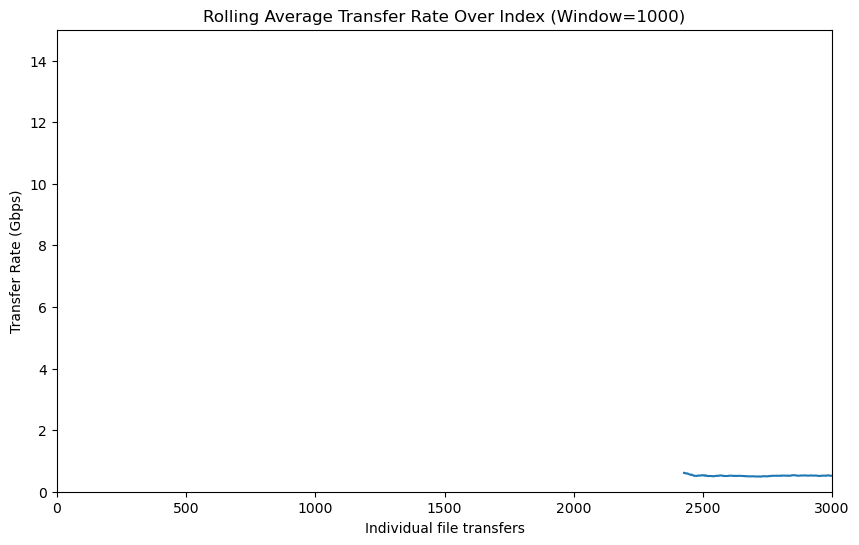

In [25]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'file']['TRANSFER_RATE'].rolling(window=100).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,3000)
plt.ylim(0, 15)
plt.xlabel('Individual file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

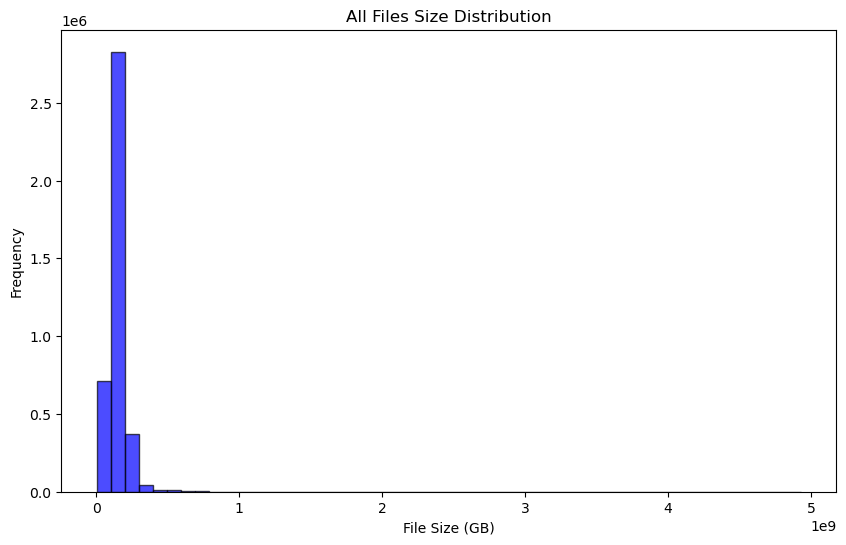

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['FILE_SIZE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Size Distribution')
plt.xlabel('File Size (GB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

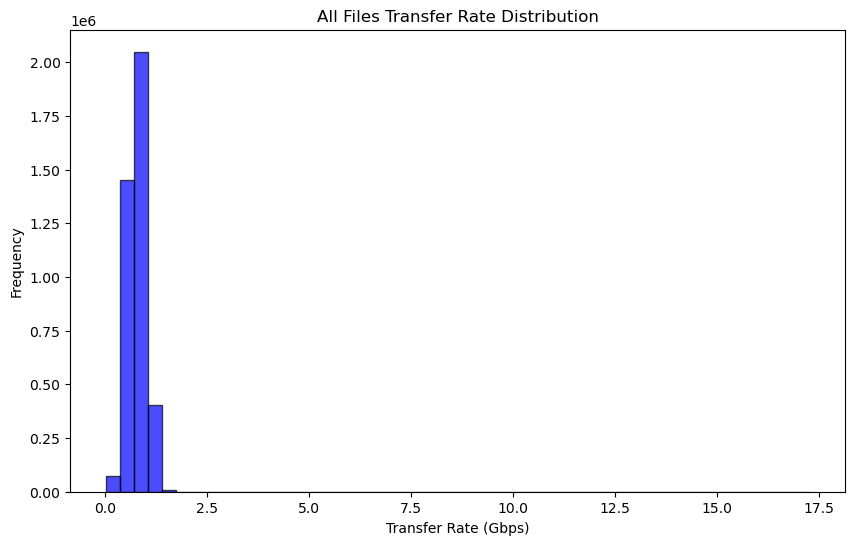

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

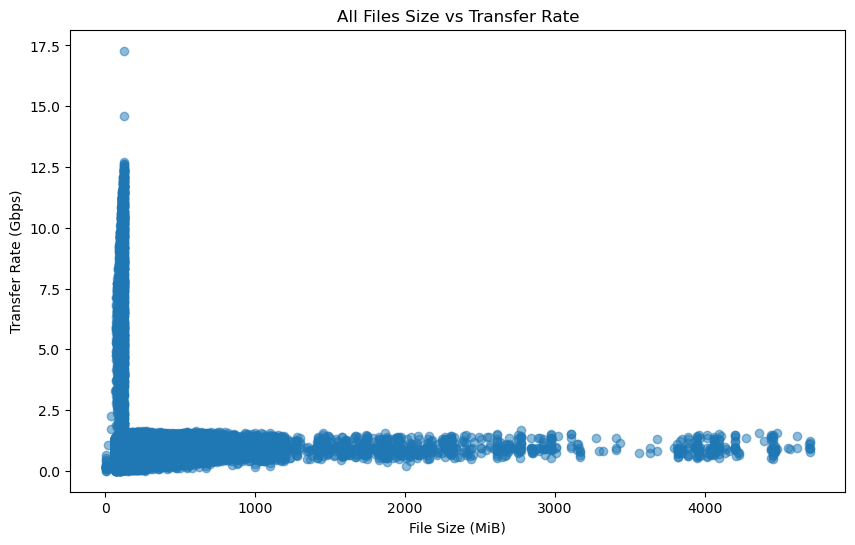

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FILE_SIZE'] / 1024**2, df['TRANSFER_RATE'], alpha=0.5)
plt.title('All Files Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

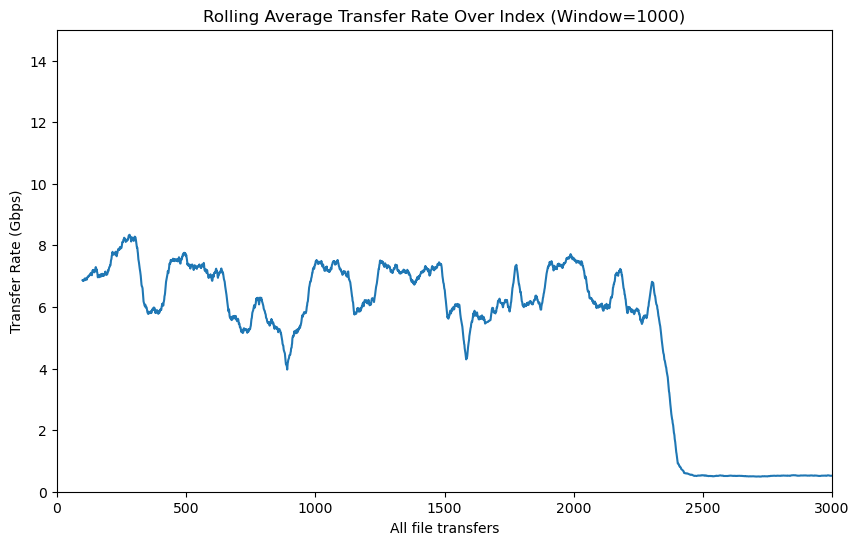

In [29]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df['TRANSFER_RATE'].rolling(window=100).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,3000)
plt.ylim(0, 15)
plt.xlabel('All file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

In [30]:
df[df['TRANSFER_RATE'] > 10].sort_values(by='TRANSFER_RATE', ascending=False).head(100)

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE,TRANSFER_RATE
911,134297651,171,0.057897,2025-09-12 11:47:35.392384,2025-09-12 11:47:35.450281,False,zip,17.282337
1895,133907261,276,0.068423,2025-09-12 11:55:22.541842,2025-09-12 11:55:22.610265,False,zip,14.581162
422,133594546,6,0.078278,2025-09-12 11:43:16.169214,2025-09-12 11:43:16.247492,False,zip,12.715666
128,133124550,4,0.078486,2025-09-12 11:41:11.173623,2025-09-12 11:41:11.252109,False,zip,12.637352
786,132802676,5,0.078447,2025-09-12 11:46:25.808520,2025-09-12 11:46:25.886967,True,zip,12.613064
...,...,...,...,...,...,...,...,...
55,122791198,4,0.079688,2025-09-12 11:40:52.383987,2025-09-12 11:40:52.463675,True,zip,11.480596
893,128570708,3,0.083455,2025-09-12 11:47:28.588900,2025-09-12 11:47:28.672355,True,zip,11.478359
1333,127701086,8,0.082912,2025-09-12 11:50:49.687959,2025-09-12 11:50:49.770871,True,zip,11.475386
1772,120261710,28,0.078094,2025-09-12 11:54:02.382092,2025-09-12 11:54:02.460186,False,zip,11.473603


In [ ]:
import numpy as np
from dask import dataframe as dd
from distributed import Client
client = Client()
print(client.dashboard_link)
df = df.sort_values(by='UPLOAD_START').reset_index(drop=True)
client.scatter(df)
print("sorted df")
print("from pandas df to dask ddf")
ddf = dd.from_pandas(df, npartitions=4000)
# --- 1. Data Preparation ---
# Ensure datetime types for accurate calculations
# ddf['UPLOAD_START'] = dd.to_datetime(ddf['UPLOAD_START'])
# ddf['UPLOAD_END'] = dd.to_datetime(ddf['UPLOAD_END'])

# Sort by upload start time to process events chronologically
# --- 2. Create an Event Timeline ---
# Create a list of "events": the start and end of each transfer.
# At each start, the total network rate increases. At each end, it decreases.
def gen_events(row):
    events = []
    if pd.notna(row['TRANSFER_RATE']) and row['TRANSFER_RATE'] > 0:
        events.append({'time': row['UPLOAD_START'], 'rate_change': row['TRANSFER_RATE']})
        events.append({'time': row['UPLOAD_END'], 'rate_change': -row['TRANSFER_RATE']})
    return pd.DataFrame(events).sort_values(by='time').reset_index(drop=True)

events_ddf = ddf.map_partitions(
    lambda partition: partition.apply(
        gen_events,
        axis=1
    ),
    meta={'time': 'datetime64[ns]', 'rate_change': 'float64'}
).dropna().reset_index(drop=True)
print("set up events_ddf")
# Convert the list of events to a DataFrame and sort chronologically
events_df = events_ddf.compute().sort_values(by='time').reset_index(drop=True)
print("computed events_df")
# --- 3. Calculate Throughput Over Time ---
# Iterate through the timeline, calculating the total data transferred during each interval
# between events. During each interval, the total transfer rate is constant.
total_data_transferred_gb = 0
current_rate_gbps = 0
print("starting loop over events_df")
for i in range(len(events_df) - 1):
    # Update the current total rate with the change from the current event
    current_rate_gbps += events_df.loc[i, 'rate_change']
    
    # Calculate the duration of the current interval (until the next event)
    start_interval = events_df.loc[i, 'time']
    end_interval = events_df.loc[i + 1, 'time']
    duration_seconds = (end_interval - start_interval).total_seconds()
    
    # If there is time between events, calculate data transferred and add to total
    if duration_seconds > 0:
        # Data = Rate (Gbps) * Time (s) -> gives Gigabits
        data_in_interval_gb = current_rate_gbps * duration_seconds
        total_data_transferred_gb += data_in_interval_gb

# --- 4. Calculate Final Results ---
# Total time from the first upload start to the last upload end
total_duration_seconds = (events_df['time'].max() - events_df['time'].min()).total_seconds()

# The overall average network speed is the total data transferred divided by the total time
if total_duration_seconds > 0:
    estimated_total_speed_gbps = total_data_transferred_gb / total_duration_seconds
else:
    estimated_total_speed_gbps = 0

print(f"Total duration of all transfers: {total_duration_seconds:.2f} seconds")
print(f"Total data transferred (accounting for overlaps): {total_data_transferred_gb / 8:.2f} GiB")
print(f"Estimated average total network speed: {estimated_total_speed_gbps:.2f} Gbps")

http://127.0.0.1:8787/status
sorted df
from pandas df to dask ddf
set up events_ddf


/home/dave/miniconda3/envs/lsst-uk/lib/python3.10/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 247.79 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-09-16 14:03:37,253 - distributed.worker - WARNING - Compute Failed
Key:       ('lambda-dropna-reset_index-586f4b6585343f29e9de21f28ff54954', 996)
Function:  execute_task
args:      ((<function Fused._execute_task at 0x7e4bf48e0790>, {'lambda-dropna-reset_index-586f4b6585343f29e9de21f28ff54954': ('reset_index-14f8b4941246e9943db50e6a75d49e3c', 996), ('reset_index-14f8b4941246e9943db50e6a75d49e3c', 996): (<function apply at 0x7e4c29d43490>, <methodcaller: reset_index>, [('dropna-222208cd15b863965f2c759034571411', 996)], {'drop': True}), ('dropna-222208cd15b863965f2c759034571411', 996): (<function apply at 0x7e4c29d43490>, <methodcaller: dropna>, [('lambda-139b96fa0f9bf168705e5463fec30b98', 996)], {'subset': None}), ('lambda-139b96fa0f9bf

AttributeError: 'DataFrame' object has no attribute 'name'

2025-09-16 14:03:40,174 - distributed.worker - WARNING - Compute Failed
Key:       ('lambda-dropna-reset_index-586f4b6585343f29e9de21f28ff54954', 985)
Function:  execute_task
args:      ((<function Fused._execute_task at 0x7e4bf48e0790>, {'lambda-dropna-reset_index-586f4b6585343f29e9de21f28ff54954': ('reset_index-14f8b4941246e9943db50e6a75d49e3c', 985), ('reset_index-14f8b4941246e9943db50e6a75d49e3c', 985): (<function apply at 0x7e4c29d43490>, <methodcaller: reset_index>, [('dropna-222208cd15b863965f2c759034571411', 985)], {'drop': True}), ('dropna-222208cd15b863965f2c759034571411', 985): (<function apply at 0x7e4c29d43490>, <methodcaller: dropna>, [('lambda-139b96fa0f9bf168705e5463fec30b98', 985)], {'subset': None}), ('lambda-139b96fa0f9bf168705e5463fec30b98', 985): (<function apply at 0x7e4c29d43490>, <function apply_and_enforce at 0x7e4bf4912c20>, [        FILE_SIZE  FILES_PER_ZIP  UPLOAD_TIME  ... OVERLAP  TYPE  TRANSFER_RATE
982045   88932411           <NA>     1.816360  ...    Tr

In [ ]:
# Verify average
print(f"{(df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds():.2f} s, {df['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df['FILE_SIZE'].sum() * 8 / (1024**3) / ((df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")

2651.83 s, 4104.63 GiB, 12.38 Gbps


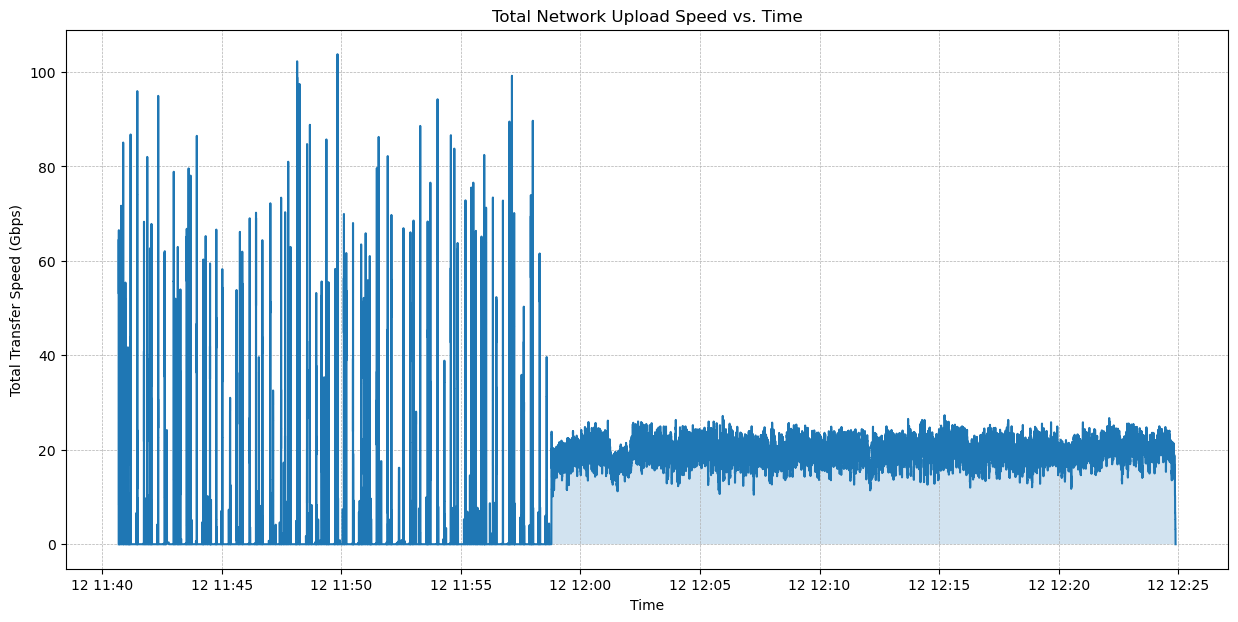

In [ ]:
# --- 5. Plot Total Throughput Over Time ---

# Calculate the cumulative sum of rate changes to get the total network speed at any given time.
events_df['total_rate'] = events_df['rate_change'].cumsum()

# Prepare data for a step plot to accurately visualize the changes.
# We need to create pairs of points to draw horizontal lines.
plot_times = []
plot_rates = []
# Start the plot at a rate of 0 just before the first event.
plot_times.append(events_df['time'].iloc[0])
plot_rates.append(0)

for i in range(len(events_df) - 1):
    # Add a point at the beginning of the interval with the new rate
    plot_times.append(events_df['time'].iloc[i])
    plot_rates.append(events_df['total_rate'].iloc[i])
    # Add a point at the end of the interval with the same rate to create the horizontal step
    plot_times.append(events_df['time'].iloc[i+1])
    plot_rates.append(events_df['total_rate'].iloc[i])

# Add the final point
plot_times.append(events_df['time'].iloc[-1])
plot_rates.append(events_df['total_rate'].iloc[-1])


# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(plot_times, plot_rates)
plt.title('Total Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed (Gbps)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.2)
plt.show()

In [ ]:
events_df

,time,rate_change,total_rate
0,2025-09-12 11:40:41.336259,4.616380,4.616380e+00
1,2025-09-12 11:40:41.349119,5.482464,1.009884e+01
2,2025-09-12 11:40:41.394203,5.469729,1.556857e+01
3,2025-09-12 11:40:41.397440,4.219850,1.978842e+01
4,2025-09-12 11:40:41.401699,6.588060,2.637648e+01
...,...,...,...
59989,2025-09-12 12:24:52.971812,-0.527861,2.178798e+00
59990,2025-09-12 12:24:53.055921,-0.576716,1.602082e+00
59991,2025-09-12 12:24:53.086607,-0.414181,1.187901e+00
59992,2025-09-12 12:24:53.141323,-0.649780,5.381208e-01


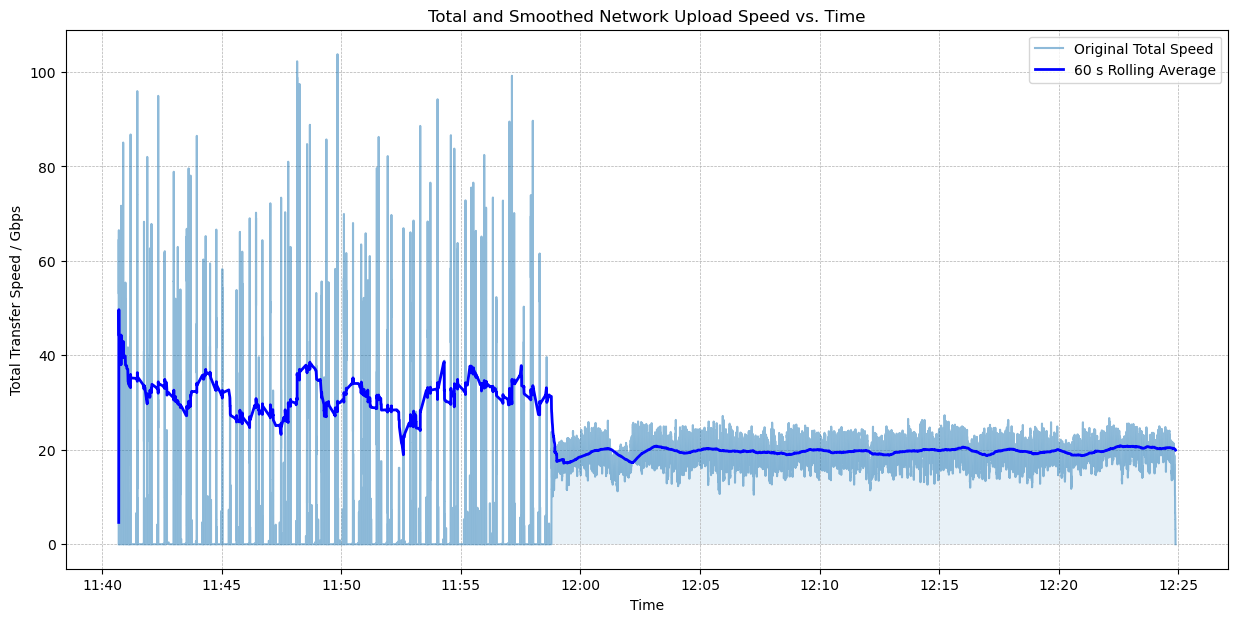

In [ ]:
# --- 6. Plot Smoothed Throughput Over Time ---

# Import the necessary formatter from matplotlib
from matplotlib.dates import DateFormatter

# To perform a time-based rolling average, we first set the 'time' column as the index.
events_indexed_by_time = events_df.set_index('time')

# Calculate the rolling mean over a 60-second window.
# This creates a new series with the smoothed transfer rate.
smoothed_rate = events_indexed_by_time['total_rate'].rolling('60s').mean()


# Plotting the original and smoothed data together
plt.figure(figsize=(15, 7))

# Plot the original, "spiky" step plot from the previous cell
plt.plot(plot_times, plot_rates, label='Original Total Speed', alpha=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.1)

# Plot the new smoothed data
plt.plot(smoothed_rate.index, smoothed_rate.values, label='60 s Rolling Average', color='blue', linewidth=2)

plt.title('Total and Smoothed Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed / Gbps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.xlim(events_df['time'].min()+pd.Timedelta(minutes=20), events_df['time'].max()+pd.Timedelta(minutes=10))
# plt.ylim(0, 40)
plt.legend()

# Get the current axes and set the x-axis formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.show()